# Homework 4 written portion

Kelcey Davis

Colaborators:

Time to complete:

In [1]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

# Problem 1


Dynamic is our Galaxy. In this problem, we’ll explore how the components of the
Milky Way rotate, and see how much dark matter is needed to match the observations.

a. (4 pts) Consider the Galactic disk to have an a stellar mass surface density:

$\Sigma(r) = \Sigma_0 e^{-r/h}$

where Σ(rq) is the mass surface density (in units of Md kpc ́2), Σ0 is the central mass surface density, and h is the radial disk scale length (assume h=3.5 kpc for this problem).

i) 3 pts Write down an expression for the total stellar mass in the disk as a function of radius:
Mprq. This will involve an integral in 2-dimensional polar coordinates (since we’re looking at a
mass surface density, we’ve effectively collapsed the galaxy in the z-direction, and so can disregard
that here). You can solve numerically or use an integral table if you want, but please give the final
analytic expression. As a reminder:

ż ż dA “
ż 2π
0
ż r
0
rdrdθ (2)
ii) 1 pt Solve for the normalization Σ0 which gives the total disk mass of the Milky Way (assume
this to be 6 ˆ 1010 Md and Rdisk “ 25 kpc). Answer in units of Md/kpc2

**answer**

i)

$M(r) = ???$

density(r) = mass(r)/volume(r) 

$M(r) = \Sigma(r) V(r)$

and by using a volume integral we inherently use the volume term, so we can just integrate the density.


$\int \int  \Sigma_0 e^{-r/h} dA $

$\int_0^{2 \pi} \int_0^r \Sigma_0 e^{-r/h} r dr d\theta$

 $ M(r) = 2 \pi \Sigma_0 \int_0^r  e^{-r/h} r dr$

from wolfram alpha,

$\int_0^r  e^{-r/h} r dr = h(h - e^{-r/h}(h+r))$

$M(r) =  2 \pi \Sigma_0 h(h - e^{-r/h}(h+r))$

ii)

let h = 3.5 kpc

M(R) = 6e10 [Msun]

R = 25 kpc

$\frac{M(r)}{2 \pi h(h - e^{-r/h}(h+r))} =   \Sigma_0$

In [14]:
h = 3.5
R = 25
M = 6e10
sig0 = M/(2*np.pi*h*(h-np.e**(-R/h)*(h+R)))
print(f'The normalized  Σ0 is {sig0:.2e} [M0/kpc^2]. ')

The normalized  Σ0 is 7.85e+08 [M0/kpc^2]. 


b. Now we will explore what the rotation curve for such a disk looks like.

i) 1 pt Assuming that all objects in the disk have purely circular orbits, derive an expression for
the rotational velocity as a function of the distance from the center of the disk (e.g., the radius).
Give the expression in terms of Mprq. Take this expression and plug in your expression from part
a) for Mprq.


We can set the forces equal to each other to solve this problem.

The force due to gravity is:

$F = \frac{GMm}{r^2} = \frac{GM(r)M_*}{r^2}$

where $M_*$ is the mass of the star.

This balances the centripetal force:

$F = \frac{m v^2}{r} = \frac{M_* v^2}{r}$

Setting these equal:

$\frac{GM(r)M_*}{r^2} = \frac{M_* v^2}{r}$

$v = \sqrt{\frac{GM(r)}{r}}$

$v = \sqrt{\frac{G}{r} 2 \pi \Sigma_0 h(h - e^{-r/h}(h+r))} $

ii) 1 pt What are the units of this expression? Derive the conversion factor you need to include to
ensure that the units of velocity are in km/s, but leaving quantities in earlier defined units (e.g.,
Md/kpc2
, cgs units for G, r in kpc, etc). Show your work, and list your final equation for V prq
[km/s].


The units for our mass were $[M_0]$ (stellar mass), the units of radius were kpc.This becomes:

In [41]:
unt = (u.M_sun/u.kpc)**(1/2)
unt

Unit("solMass(1/2) / kpc(1/2)")

Which decomposes to km/s.

just using dimensional analysis:

$\frac{M_0^{1/2}}{kpc^{1/2} } * (1.989e30 \frac{kg}{M_0})^{1/2}* (3.086e21\frac{kpc}{cm})^{1/2}$

In [71]:
scale = (1.989e30**(1/2))*(3.086e21**(1/2))
print(f'The scale factor is {scale:.1e}')

The scale factor is 7.8e+25


iii) 3 pts Plot the rotation velocity of your disk as a function of radius out to 50 kpc. You can do
this in the google colab notebook I shared with you or on your own. If you do it colab, just share
the completed notebook with me, if on your own, just create a PDF of your figures and code to
share with me.


$v = \sqrt{\frac{G}{r} 2 \pi \Sigma_0 h(h - e^{-r/h}(h+r))} $

In [80]:
G = c.G.decompose(bases=u.cgs.bases)
rvals = np.arange(0,50,.1)
v = np.sqrt((G/rvals)*2*np.pi*sig0*h*(h-np.e**(-rvals/h)*(h+rvals)))

/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


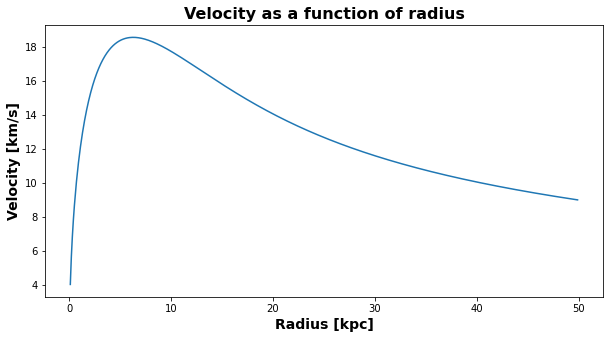

In [81]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(rvals,v)
plt.ylabel('Velocity [km/s]')
plt.xlabel('Radius [kpc]')
plt.title('Velocity as a function of radius');

iv) 1 pt What is the rotation velocity from your model of the disk at the Galactocentric radius (8
kpc), and how does it compare to the Sun’s known rotational velocity of 220 km/s? How can we
explain the difference?

In [87]:
rvals = 8
v = np.sqrt((G/rvals)*2*np.pi*sig0*h*(h-np.e**(-rvals/h)*(h+rvals)))
print(f'We are off by about an order of magnitude. The velocity is {v.value:.2e} [km/s].')

We are off by about an order of magnitude. The velocity is 1.83e+01 [km/s].


c. In part b, you derived that there must be some kind of “dark matter” which is
permeating the Milky Way disk, and increasing the rotational velocities of stars over what
they should be when only considering the mass of the disk (awesome job!). In this part of the
problem, we will consider how much dark matter we need to include.

i) 1 pt Write down an expression for the dark matter density ρprq in terms of the radius r and
critical radius rc we used in PS3 (Question 2b). Write down the enclosed mass of dark matter at
given radius r that you derived in PS3 (Question 2b).

$\rho(r) = \frac{\rho_0}{1+[\frac{r}{a}]^2}$

the enclosed mass of dark matter at a radius r is given by:

$M_r = 4 \pi \rho_0 a^2 [r-atan^{-1}(\frac{r}{a})]$

and we derived:

$M_{encl} = 4 \pi \rho_0 a^2[r - a tan^{-1}(\frac{r}{a})]$


ii) 1 pt Using the expression for V prq you derived in part b, derive an expression for the rotational
velocity V prq for this dark matter halo mass distribution (for the halo only, ignore the disk for
now). Be sure to check your units. This should still be in terms of ρ0 and rc.

from b:
    
$v = \sqrt{\frac{G}{r} 2 \pi \Sigma_0 h(h - e^{-r/h}(h+r))} $



$v = \sqrt{\frac{GM}{r}}$

$v = \sqrt{\frac{G  4 \pi \rho_0 a^2 [r-atan^{-1}(\frac{r}{a})]}{r}}$

iii) 3 pts Now, I will give you that rc = 1.28 kpc and ρ0 = 7.1 ˆ108 Md kpc ́2

. Plot the rotation

velocity of your halo as a function of radius out to 50 kpc.

d.

Now we can put both the disk and the halo together to explore the full rotation curve
of our galaxy.

i) 1 pt Use the definition for circular velocity (e.g., what we showed in question b part i) for each
component to show that you can combine them as: v
2
tot “ v
2
disk ` v
2
halo.


$v_{tot}^2 =  {\frac{G}{r} 2 \pi \Sigma_0 h(h - e^{-r/h}(h+r))} + {\frac{G  4 \pi \rho_0 a^2 [r-atan^{-1}(\frac{r}{a})]}{r}}$

/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


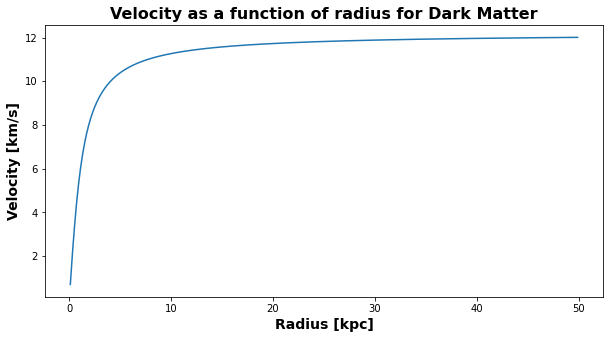

In [110]:
G = c.G.decompose(bases=u.cgs.bases)
rvals = np.arange(0,50,.1)
p0 = 7.1e8
a = 1
v = np.sqrt((G*np.pi*p0*(a**2)*(rvals - a*np.arctan(rvals/a)))/(rvals))
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(rvals,v)
plt.ylabel('Velocity [km/s]')
plt.xlabel('Radius [kpc]')
plt.title('Velocity as a function of radius for Dark Matter');

ii) 2 pts Combine your disk and halo rotation curves in this way to calculate the total rotational
velocity, and plot the total versus radius, out to r=50 kpc. Please also overplot the curve for the
individual components, in a different color or line style, and be sure to provide a legend to explain
the curves.



/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/kelcey/anaconda3/envs/hera/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


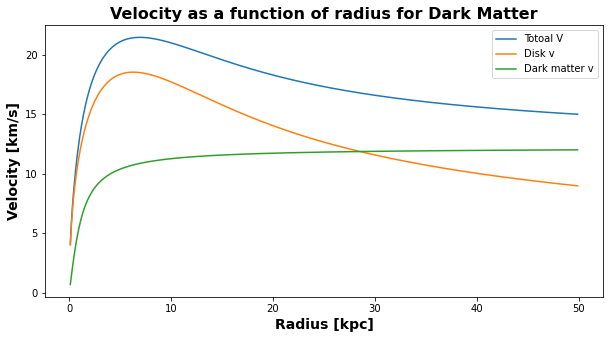

In [101]:
G = c.G.decompose(bases=u.cgs.bases)
rvals = np.arange(0,50,.1)
v1 = ((G/rvals)*2*np.pi*sig0*h*(h-np.e**(-rvals/h)*(h+rvals)))

p0 = 7.1e8
a = 1
v2 = ((G*np.pi*p0*(a**2)*(rvals - a*np.arctan(rvals/a)))/(rvals))

v = np.sqrt(v1+v2)
plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(rvals,v, label = 'Totoal V')
plt.plot(rvals, np.sqrt(v1), label = 'Disk v')
plt.plot(rvals, np.sqrt(v2), label = 'Dark matter v')
plt.ylabel('Velocity [km/s]')
plt.xlabel('Radius [kpc]')
plt.title('Velocity as a function of radius for Dark Matter')
plt.legend();

iii) 1 pt What is the ratio of the velocity contributed by the dark matter halo to that by the stellar
disk at the Galactocentric radius (R0 “8 kpc)?



In [109]:
G = c.G.decompose(bases=u.cgs.bases)
rvals = 8
v1 = ((G/rvals)*2*np.pi*sig0*h*(h-np.e**(-rvals/h)*(h+rvals)))

p0 = 7.1e8
a = 1
v2 = ((G*np.pi*p0*(a**2)*(rvals - a*np.arctan(rvals/a)))/(rvals))
print(f'The ratio is {round(v1.value/v2.value,2)}.')

The ratio is 2.75.


iv) 1 pt Is the galaxy rotation curve ever dominated by the disk component? If so, where? To
illustrate your answer, make another plot of the three rotation curves (disk, halo and total), with
the x-axis plotted in log.

Yes. It seems to be dominated closer to the center, and gives way to dark matter somewhere around r>25ish.

(e) (1 pt) Using your expression from part c, calculate the total mass of the dark matter halo out
to 50 kpc. What is the ratio of the stellar mass of the disk to the dark matter halo mass?

$v = \sqrt{\frac{G  4 \pi \rho_0 a^2 [r-atan^{-1}(\frac{r}{a})]}{r}}$

$M_r = 4 \pi \rho_0 a^2 [r-atan^{-1}(\frac{r}{a})]$

In [115]:
p0 = 7.1e8
a = 1
r = 50
m = 4*np.pi*p0*(a**2)*(r - a*np.arctan(r/a))
print(f'The total mass is {m:.2e} kg.')

The total mass is 4.32e+11 kg.


In [117]:
# For stellar mass,
ratio = m/6e10
print(f'The ratio to stellar mass is {round(ratio,2)}.')

The ratio to stellar mass is 7.2.


(f) (1 pt) We have ignored the bulge and the stellar halo in this problem, predominantly because
the integrals are less trivial to solve. Where do you think the lack of these components matters
the most?

This matters most near the center of the galaxies and away from the galactic plane.

# Probelm 2

On coding section

# Problem 3 


In class, we derived the Jean’s Mass for a forming protostar, by finding the critical mass
where the gravitational potential of a spherical cloud is greater than its thermal energy. Please
re-derive the Jean’s mass for the two cases described below. For each case, calculate a Jean’s
mass in Md and compare with that using the standard assumptions (spherical cloud of uniform
density balanced by isothermal gas pressure). Calculate the Jean’s mass in Md for a cloud with a
temperature, T “ 10 K and gas number density, n “ 2 ˆ 105
cm ́3
(you will need to convert to a

mass density). 1 Please give masses in Md.
(a) (8 pts) a sphere with a density distribution given by nprq “ nf p
r
rf
q
 ́p where p=1.8, rf “ 1000

AU and nf “ 107
cm ́3
, dominated by thermal pressure (as in the standard case).

**answer**

a. 

$n(r) = n_f (\frac{r}{r_f})^{-p}$

n = 2e5 cm^-3 (convert)

T = 10k

p = 1.8

$r_f$ = 1000 AU

$n_f$ = 10^7cm^-3

we have the internal energy from class:

$E = \frac{3}{2} N k_B T$

We need to derive our own expression for U.

we know 

$\rho(r) = n(r) M(r)$

Previously, we could use:

$U = \frac{3}{5}\frac{GM^2}{R}$

but now M(r) is not uniform? I'll find it by integrating the density distribution function:

$M(r) = 4π  \int_0^r n(r)  r^2 dr$

$M(r) = 4π  \int_0^r n_f (\frac{r}{r_f})^{-p}  r^2 dr$

$M(r) = 4π \frac{n_f}{r_f^{-p}} \int_0^r ({r})^{-p}  r^2 dr$

$M(r) = 4π \frac{n_f}{r_f^{-p}} \int_0^r {r}^{2-p}  dr$

calling on wolfram alpha to get us through this integral:

$M(r) = 4π \frac{n_f}{r_f^{-p}} \frac{-r^{3-p}}{p-3}$

$U = \frac{3}{5}\frac{G}{R}[4π \frac{n_f}{r_f^{-p}} \frac{-r^{3-p}}{p-3}]^2$

$U > \frac{3}{2} NkT$


$\frac{3}{5}\frac{G}{R}[4π \frac{n_f}{r_f^{-p}} \frac{-r^{3-p}}{p-3}]^2 > \frac{3}{2} kT \frac{M}{\mu m_H}$

$M < \frac{3*2}{5*3}\frac{G}{R}[4π \frac{n_f}{r_f^{-p}} \frac{-r^{3-p}}{p-3}]^2 \frac{\mu m_H}{kT}$

The critical point is at M = $M_{Jeans}$

$M_J = \frac{2}{5}\frac{G}{R}[4π \frac{n_f}{r_f^{-p}} \frac{-r^{3-p}}{p-3}]^2 \frac{\mu m_H}{kT}$

(4 pts) a sphere with uniform density (as in the standard case), however, the thermal pressure
is negligible as the internal energy of the gas is dominated by turbulence. You can assume
that the turbulent energy can be incorporated by replacing the sound speed of the gas with
the velocity linewidth (assume σ „ 1 kms ́1
).2

$U = \frac{-3}{5} \frac{GM^2}{R}$

$P = \frac{\rho k_B T}{\mu m_H}$

$c_s = \sqrt{\frac{k_B T}{\mu m_H}}$

$U > \frac{3}{2} NkT$

$ \frac{-3}{5} \frac{GM^2}{R} > \frac{3}{2} NkT$


Again, the critical mass is given by:

$M_J = \sqrt{\frac{-5 N k_B T R }{2G}}$